<a href="https://colab.research.google.com/github/cmgospod/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module3-introduction-to-bayesian-inference/LS_DS_133_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 133

## Introduction to Bayesian Inference




## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

In [0]:
# def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk):
#   return prob_positive_drunk * prob_drunk_prior / prob_positive
# prob_drunk_given_positive(0.001, 0.08, 1)  
# prob_a|b
# prob_b|a
# prob_a
# prob_b

In [0]:
def bayes_rule(prior_a, prob_b, prob_b_a):
  return prob_b_a * prior_a / prob_b
bayes_rule(0.001, 0.08, 1)  

0.0125

In [0]:
from scipy import stats
import numpy as np
data = [4,46,27,82,45,4,432,28,3]
stats.bayes_mvs(data)

(Mean(statistic=74.55555555555556, minmax=(-10.0420222107999, 159.15313332191099)),
 Variance(statistic=24836.037037037036, minmax=(9609.416001688225, 54532.02656741605)),
 Std_dev(statistic=151.19127685557334, minmax=(98.02762876703804, 233.52093389547767)))

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',
                header=None,
                names=['party','handicapped-infants','water-project',
                      'budget', 'physician-fee-freeze','el-salvador',
                      'religion-groups','anti-satellite-ban',
                      'aid-to-contras','mx-missile','immigration',
                      'synfuels','education','right-to-sue','crime','duty-free',
                      'south-africa'], na_values='?')
df = df.replace({'n':0,'y':1})

In [0]:
rep = df[df.party == 'republican']
dem = df[df.party == 'democrat']

In [0]:
watercleanrep = rep['water-project'].dropna()
bmean, bvar, bstdev = stats.bayes_mvs(watercleanrep)
fmean = np.mean(watercleanrep)
print(fmean)
type(bmean)

0.5067567567567568


scipy.stats.morestats.Mean

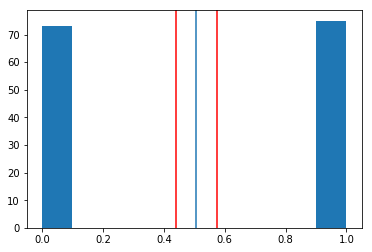

In [0]:
plt.hist(watercleanrep)
plt.axvline(x=mean.minmax[0], color = 'r', label = 'Bayesian lower bound')
plt.axvline(x=mean.minmax[1], color = 'r', label = 'Bayesian upper bound')
plt.axvline(x=fmean, label = 'Mean')

In [0]:
# for issue in range(1,df.shape[1]):
#   print(stats.ttest_ind(rep.iloc[:,issue], dem.iloc[:,issue], nan_policy='omit'))
#   print(df.columns.values[issue])
#   frequentist = []
#   frequentist.append(df.columns.values[issue])
#   print('\n')

In [0]:
# for issue in range(1,df.shape[1]):
#   dfclean = df.iloc[:,issue].dropna()
#   repclean = rep.iloc[:,issue].dropna()
#   demclean = dem.iloc[:,issue].dropna()
#   prior_vote = dfclean.iloc[:,issue].mean()
#   prior_party = repclean.shape[0] / (repclean.shape[0] + demclean.shape[0])
#   party_given_vote = 

Frequentist statistics are purely based on the data on display, while Bayesian statistics use a prior to guide inference. This allows Bayesianism to sidestep failures of frequentist statistics, but can be badly wrong with a bad prior.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

(sensitivity * prior) / (sensitivity * prior + (1-specificity) * (1-prior))

In [0]:
def iterated_bayes_theorem(prior, sensitivity, specificity, num_iterations=1):
#  for num_iterations:
# do some math stuff with other variables
# get result
# prior = result
  
  
  
  
  
  
  return prior